# Experiment 5.1



--Import Required Libraries--

--Load and Prepare Data--

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Download dataset directly from source
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Extract the temperature values
series = df['Temp'].values.reshape(-1, 1)

# Display first few rows
print("Dataset Head:")
print(df.head())
print("\nDataset Shape:", df.shape)

Dataset Head:
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

Dataset Shape: (3650, 1)


--Normalize Data--


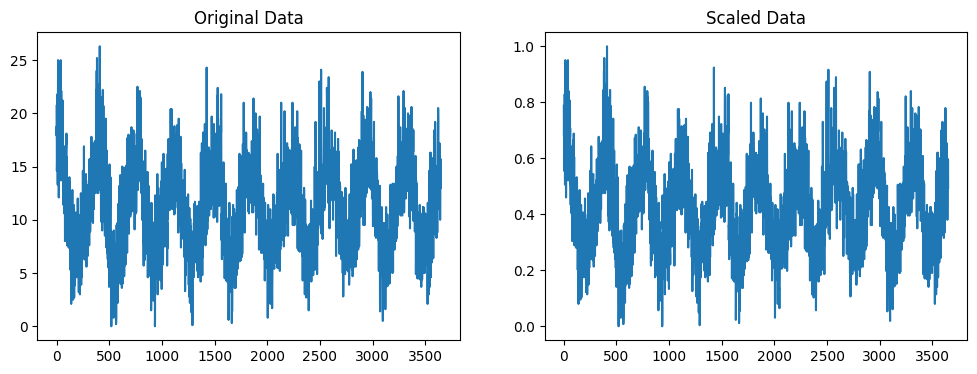

In [5]:
# Initialize scaler and normalize data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series)

# Plot original vs scaled data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(series)
plt.title("Original Data")
plt.subplot(1, 2, 2)
plt.plot(series_scaled)
plt.title("Scaled Data")
plt.show()

--Split Data into Train/Test Sets--

--Create Sequences for LSTM--


In [6]:
# Split into training (80%) and testing (20%) sets
train_size = int(len(series_scaled) * 0.8)
train, test = series_scaled[:train_size], series_scaled[train_size:]

print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

def create_sequences(data, window_size):
    """Convert time series into supervised learning format"""
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Set window size (number of time steps to look back)
window_size = 30

# Create sequences for training and testing
X_train, y_train = create_sequences(train, window_size)
X_test, y_test = create_sequences(test, window_size)

print(f"Training shapes - X: {X_train.shape}, y: {y_train.shape}")
print(f"Testing shapes - X: {X_test.shape}, y: {y_test.shape}")

Training set size: 2920
Testing set size: 730
Training shapes - X: (2890, 30, 1), y: (2890, 1)
Testing shapes - X: (700, 30, 1), y: (700, 1)


--Build LSTM Model--

In [7]:
model = Sequential([
    # First LSTM layer with return sequences
    LSTM(50, activation='relu',
         input_shape=(window_size, 1),
         return_sequences=True),
    Dropout(0.2),  # Regularization

    # Second LSTM layer
    LSTM(50, activation='relu'),
    Dropout(0.2),  # Regularization

    # Output layer
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 --Train the Model--

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0469 - val_loss: 0.0110
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0152 - val_loss: 0.0100
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0148 - val_loss: 0.0113
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0137 - val_loss: 0.0098
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0132 - val_loss: 0.0096
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0128 - val_loss: 0.0100
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0140 - val_loss: 0.0094
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0132 - val_loss: 0.0093
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0132 - val_loss: 0.0093
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0123 - val_loss: 0.0093
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0125 - val_loss: 0.0092
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0

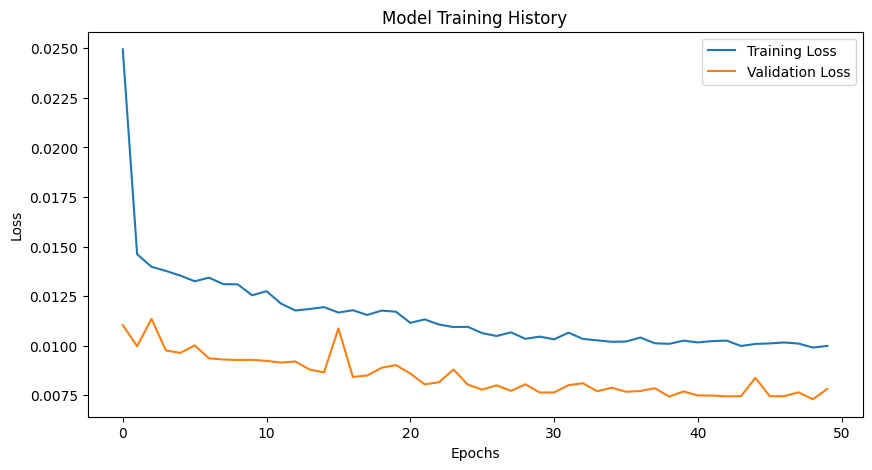

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

---Make Predictions---

---Evaluate Model Performance---

In [13]:
# Generate predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform to original scale
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform(y_train)
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test)


# Calculate evaluation metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print("\nModel Performance Metrics:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Model Performance Metrics:
Training RMSE: 213605.64
Testing RMSE: 218702.78
Training MAE: 200756.93
Testing MAE: 205705.86


---Visualize Results---

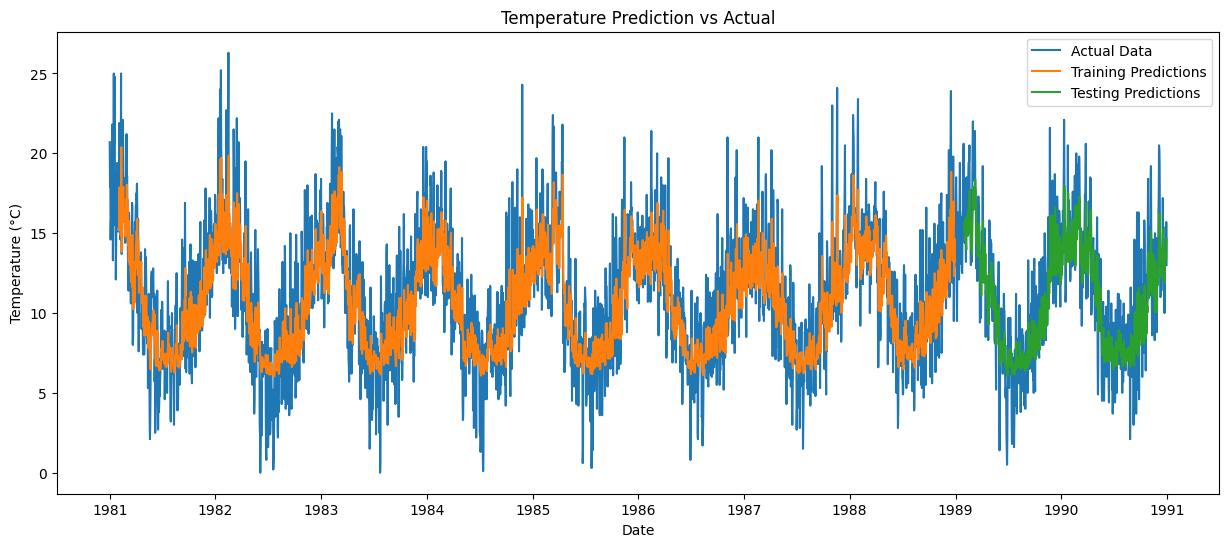

In [14]:
# Prepare data for plotting
train_plot = np.empty_like(series)
train_plot[:, :] = np.nan
train_plot[window_size:len(train_pred)+window_size] = train_pred

test_plot = np.empty_like(series)
test_plot[:, :] = np.nan
test_plot[len(train_pred)+(window_size*2):len(series)] = test_pred

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(df.index, scaler.inverse_transform(series_scaled), label='Actual Data')
plt.plot(df.index, train_plot, label='Training Predictions')
plt.plot(df.index, test_plot, label='Testing Predictions')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# **Experiment 5.2: Sequence Text Prediction using LSTM**

---Load and Inspect the Dataset---

In [28]:
import tensorflow as tf
import numpy as np

# Load Shakespeare text (first 500k chars for faster prototyping)
shakespeare_url = "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt"
filepath = tf.keras.utils.get_file('shakespeare.txt', shakespeare_url)
text = open(filepath, 'rb').read().decode(encoding='utf-8')[:500000]  # Reduced dataset

print(f"Dataset length: {len(text)} characters")
print("\nSample text:\n", text[:100])

Dataset length: 500000 characters

Sample text:
 First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


**---Preprocess the Text---**

In [29]:
# Create vocabulary and mapping
vocab = sorted(set(text))
char2idx = {char: i for i, char in enumerate(vocab)}
idx2char = np.array(vocab)

# Convert text to numerical indices
text_as_int = np.array([char2idx[char] for char in text])

**---Prepare Training Sequences---**

In [30]:
# Reduced sequence length and batch size
seq_length = 50   # Was 100
BATCH_SIZE = 32    # Was 64

# Create TensorFlow Dataset
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

# Split into input/target
def split_input_target(chunk):
    return chunk[:-1], chunk[1:]

dataset = sequences.map(split_input_target)

# Batch and shuffle (reduced buffer size)
BUFFER_SIZE = 5000  # Was 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

**---Build the LSTM Model---**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 512  # Was 1024

model = Sequential([
    Embedding(vocab_size, embedding_dim),
    LSTM(rnn_units, return_sequences=True),
    Dense(vocab_size)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.build(input_shape=(BATCH_SIZE, None))  # Explicit batch size
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (32, None, 256)        │        16,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (32, None, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, None, 63)         │        32,319 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,623,359 (6.19 MB)

 Trainable params: 1,623,359 (6.19 MB)

 Non-trainable params: 0 (0.00 B)

**---Train the Model---**

Epoch 1/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 245s 791ms/step - loss: 3.7980
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 243s 792ms/step - loss: 2.9315
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 261s 789ms/step - loss: 3.0186
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 261s 783ms/step - loss: 2.8850
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 241s 785ms/step - loss: 2.7926
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 241s 785ms/step - loss: 2.7395
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 264s 790ms/step - loss: 2.6798
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 242s 790ms/step - loss: 2.5934
Epoch 9/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 267s 804ms/step - loss: 2.8293
Epoch 10/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 259s 796ms/step - loss: 2.6255


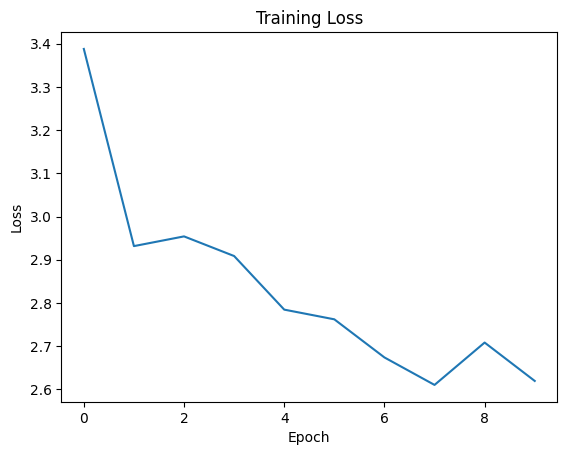

In [32]:
EPOCHS = 10  # Reduced from 30
history = model.fit(dataset, epochs=EPOCHS)

# Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**---Generate Text (Optimized)---**

In [41]:
def generate_text(model, start_string, num_generate=200, temperature=0.1):
    # Rebuild model for inference
    inf_model = Sequential([
        Embedding(vocab_size, embedding_dim),
        LSTM(rnn_units, return_sequences=True),
        Dense(vocab_size)
    ])
    inf_model.build(input_shape=(1, None))
    inf_model.set_weights(model.get_weights())

    # Generation logic
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    for _ in range(num_generate):
        predictions = inf_model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Example generation
print(generate_text(model, start_string="ROMEO: ", temperature=0.1))

ROMEO: thesnd t t thest hest t t t hes t hes t t hes t thin wes hmesthesthesI the hesthes t t thes t t t hres thest t t thes I thes tho thessthe hes he t thes hin t thares t the t co hes thes hes thes t s th


# **Experiment 5.3: Sequence Text Classification using LSTM**

\

**---Load and Explore the Dataset---**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the SMS Spam Collection Dataset
url = "https://raw.githubusercontent.com/justmarkham/pydata-dc-2016-tutorial/master/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Display first few rows
print("Dataset Head:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['label'].value_counts())

Dataset Head:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Shape: (5572, 2)

Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


**---Preprocess the Data---**

In [43]:
# Convert labels to binary (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing
texts = df['message'].values
labels = df['label'].values

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to have the same length
max_len = 100  # Maximum length of sequences
X = pad_sequences(sequences, maxlen=max_len)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

print("\nTraining data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (4457, 100)
Test data shape: (1115, 100)


**---Build the LSTM Model---**

In [44]:
# Model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
lstm_units = 64

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(lstm_units))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\nModel Summary:")
model.summary()


Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

---Train the Model---
**bold text**

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.8985 - loss: 0.3078 - val_accuracy: 0.9883 - val_loss: 0.0516
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.9913 - loss: 0.0411 - val_accuracy: 0.9928 - val_loss: 0.0412
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.9971 - loss: 0.0148 - val_accuracy: 0.9928 - val_loss: 0.0308
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9988 - loss: 0.0080 - val_accuracy: 0.9937 - val_loss: 0.0343
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9928 - val_loss: 0.0404
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.9979 - loss: 0.0056 - val_accuracy: 0.9928 - val_loss: 0.0412
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 1.0000 - loss: 8.6148e-04 - val_accuracy: 0.9937 - val_loss: 0.0445
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.9999 - loss: 

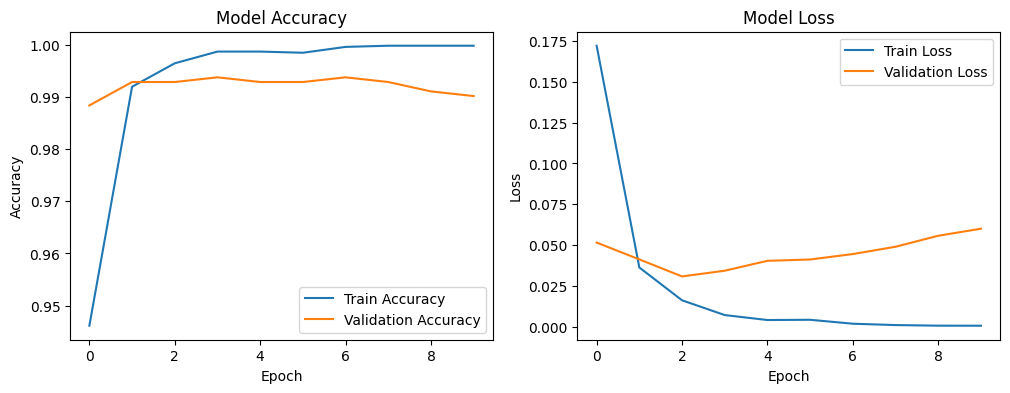

In [45]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**---Evaluate the Model---**

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


Evaluation Metrics:
Accuracy: 0.9901
Precision: 0.9726
F1-Score: 0.9627


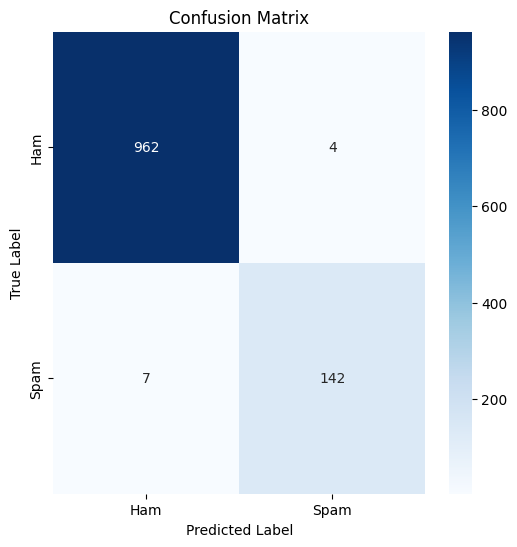

In [46]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**---Test with Sample Messages---**

In [47]:
# Function to predict new messages
def predict_spam(message):
    sequence = tokenizer.texts_to_sequences([message])
    padded = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded)
    return "Spam" if prediction > 0.5 else "Ham"

# Test samples
sample_messages = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.",
    "Hey, are we still meeting for lunch tomorrow?",
    "Congratulations! You've won a $1000 Walmart gift card! Click here to claim.",
    "Can you pick up some milk on your way home?"
]

print("\nSample Predictions:")
for msg in sample_messages:
    print(f"Message: {msg[:60]}...")
    print(f"Prediction: {predict_spam(msg)}\n")


Sample Predictions:
Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st Ma...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Prediction: Spam

Message: Hey, are we still meeting for lunch tomorrow?...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: Ham

Message: Congratulations! You've won a $1000 Walmart gift card! Click...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Spam

Message: Can you pick up some milk on your way home?...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: Ham

